<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [5]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


NormaltestResult(statistic=1.3307117688503198, pvalue=0.5140905383313149)


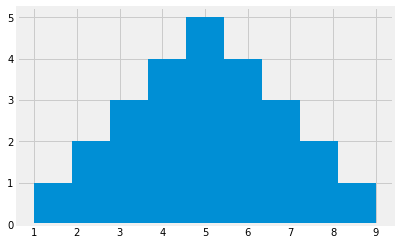

In [6]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9]
plt.hist(sample, bins=9)
print(normaltest(sample))  # Pretty clearly not normal

In [7]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.8333333333333334, 0.4166666666666667, 0.5833333333333334, 0.5, 0.5833333333333334, 0.5833333333333334, 0.3333333333333333, 0.75, 0.5833333333333334, 0.6666666666666666, 0.5, 0.5, 0.5, 0.75, 0.75, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.75, 0.75, 0.25, 0.25, 0.3333333333333333, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.3333333333333333, 0.5833333333333334, 0.5, 0.3333333333333333, 0.4166666666666667, 0.4166666666666667, 0.5, 0.5, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.5, 0.4166666666666667, 0.5, 0.6666666666666666, 0.5833333333333334, 0.5, 0.6666666666666666, 0.4166666666666667, 0.5, 0.4166666666666667, 0.5, 0.5833333333333334, 0.4166666666666667, 0.5, 0.3333333333333333, 0.5, 0.5, 0.75, 0.5833333333333334, 0.3333333333333333, 0.5, 0.6666666666666666, 0.5833333333333334, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.4166666666666667, 0.4166666666666667, 0.6666666666666666, 0.6666666666666666, 

In [11]:
df = pd.DataFrame({'a': one_sample})
df.head()

,a
0,1
1,1
2,0
3,1
4,1


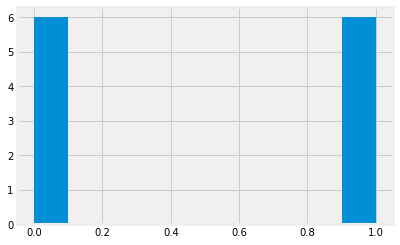

In [12]:
df.a.hist()

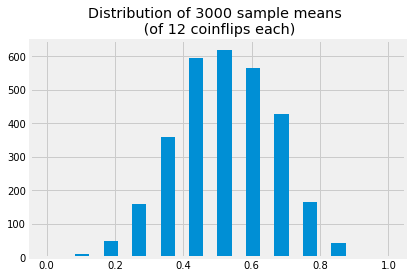

In [13]:
ax = plt.hist(sample_means, bins=24)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

## Graphically Represent a Confidence Interval

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [16]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.43333333333333335, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4, 0.5, 0.7, 0.5, 0.4666666666666667, 0.36666666666666664, 0.36666666666666664, 0.3, 0.3, 0.4666666666666667, 0.43333333333333335, 0.3333333333333333, 0.5, 0.36666666666666664, 0.7, 0.43333333333333335, 0.6666666666666666, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.43333333333333335, 0.6, 0.5, 0.6333333333333333, 0.5333333333333333, 0.4666666666666667, 0.4666666666666667, 0.43333333333333335, 0.5666666666666667, 0.5, 0.5666666666666667, 0.5666666666666667, 0.3, 0.5, 0.5, 0.4666666666666667, 0.6, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.6333333333333333, 0.5666666666666667, 0.5, 0.5, 0.6666666666666666, 0.6, 0.5666666666666667, 0.43333333333333335, 0.5666666666666667, 0.43333333333333335, 0.36666666666666664, 0.5333333333333333, 0.5, 0.4, 0.4666666666666667, 0.5, 0.4666666666666667, 0.6666666666666666, 0.5333333333333333, 0.

In [17]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.4826634786105679, 0.5193365213894321)


In [18]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.4826634786105679, 0.5193365213894321)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [19]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.1903231808828665, pvalue=0.23676589079294816)

A null hypothesis that's just outside of our confidence interval == reject



In [20]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=2.0676238285530153, pvalue=0.04128377835868194)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

## Run a $\chi^{2}$ Test using Scipy

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
# TODO - your code!

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import scipy.stats as st
plt.style.use('fivethirtyeight')
%matplotlib inline

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 250,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }
    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+
start()

In [24]:
columns = """1. Class Name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)"""

# sloppy and slow, but data is small and it's quicker than writing everything 
# out by hand
columns = columns.split("\n")
columns = [c.split(". ") for c in columns]
columns = [c[1].split(":") for c in columns]
columns = [c[0].replace('-', ' ') for c in columns]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/\
voting-records/house-votes-84.data', names=columns )

df.shape

(435, 17)

In [25]:
df['Class Name'].value_counts()

democrat      267
republican    168
Name: Class Name, dtype: int64

In [0]:
df.replace({'n': 0, "y": 1, "?": 0}, inplace=True)

df['Class Name'] = df['Class Name'].map({'republican': 1, 'democrat': 2})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class Name                                435 non-null int64
handicapped infants                       435 non-null int64
water project cost sharing                435 non-null int64
adoption of the budget resolution         435 non-null int64
physician fee freeze                      435 non-null int64
el salvador aid                           435 non-null int64
religious groups in schools               435 non-null int64
anti satellite test ban                   435 non-null int64
aid to nicaraguan contras                 435 non-null int64
mx missile                                435 non-null int64
immigration                               435 non-null int64
synfuels corporation cutback              435 non-null int64
education spending                        435 non-null int64
superfund right to sue                    435 non-null int64
crime                                    

In [0]:
rep = df.loc[df['Class Name'] == 1]
dem = df.loc[df['Class Name'] == 2]

In [29]:
grouped = df.groupby('Class Name')
for feat in df.columns[1:]:
    print(grouped[feat].value_counts())
    print("\n")

Class Name  handicapped infants
1           0                      137
            1                       31
2           1                      156
            0                      111
Name: handicapped infants, dtype: int64


Class Name  water project cost sharing
1           0                              93
            1                              75
2           0                             147
            1                             120
Name: water project cost sharing, dtype: int64


Class Name  adoption of the budget resolution
1           0                                    146
            1                                     22
2           1                                    231
            0                                     36
Name: adoption of the budget resolution, dtype: int64


Class Name  physician fee freeze
1           1                       163
            0                         5
2           0                       253
            1                  

In [30]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

models = {}
results = {}

for idx, feat in enumerate(df.columns):
    X = df.drop(feat, axis=1).astype(int)
    y = df[feat].astype(int)
    logit = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X,y)
    print(feat," - ", logit.score(X,y))
    results[feat] = logit.score(X,y)
    models[feat] = logit

Class Name  -  0.9701149425287356
handicapped infants  -  0.7333333333333333
water project cost sharing  -  0.6827586206896552
adoption of the budget resolution  -  0.8850574712643678
physician fee freeze  -  0.9540229885057471
el salvador aid  -  0.9494252873563218
religious groups in schools  -  0.8597701149425288
anti satellite test ban  -  0.864367816091954
aid to nicaraguan contras  -  0.9126436781609195
mx missile  -  0.8804597701149425
immigration  -  0.6045977011494252
synfuels corporation cutback  -  0.7494252873563219
education spending  -  0.8804597701149425
superfund right to sue  -  0.8459770114942529
crime  -  0.8620689655172413
duty free exports  -  0.7931034482758621
export administration act south africa  -  0.6505747126436782


In [31]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['score'])
results_df.sort_values(by="score").head(18)

,score
immigration,0.6046
export administration act south africa,0.6506
water project cost sharing,0.6828
handicapped infants,0.7333
synfuels corporation cutback,0.7494
duty free exports,0.7931
superfund right to sue,0.8460
religious groups in schools,0.8598
crime,0.8621
anti satellite test ban,0.8644


In [32]:
dem.mean().sort_values()[:-1]

physician fee freeze                      0.0524
education spending                        0.1348
el salvador aid                           0.2060
superfund right to sue                    0.2734
crime                                     0.3371
water project cost sharing                0.4494
religious groups in schools               0.4607
immigration                               0.4644
synfuels corporation cutback              0.4831
handicapped infants                       0.5843
duty free exports                         0.5993
export administration act south africa    0.6479
mx missile                                0.7041
anti satellite test ban                   0.7491
aid to nicaraguan contras                 0.8165
adoption of the budget resolution         0.8652
dtype: float64

In [33]:
rep_means = pd.DataFrame(rep.mean().sort_values()[:-1], columns=["rep"])
rep_means

,rep
duty free exports,0.0833
mx missile,0.1131
synfuels corporation cutback,0.1250
adoption of the budget resolution,0.1310
aid to nicaraguan contras,0.1429
handicapped infants,0.1845
anti satellite test ban,0.2321
water project cost sharing,0.4464
immigration,0.5476
export administration act south africa,0.5714


In [34]:
dem_means = pd.DataFrame(dem.mean().sort_values()[:-1], columns=["dem"])
dem_means

,dem
physician fee freeze,0.0524
education spending,0.1348
el salvador aid,0.2060
superfund right to sue,0.2734
crime,0.3371
water project cost sharing,0.4494
religious groups in schools,0.4607
immigration,0.4644
synfuels corporation cutback,0.4831
handicapped infants,0.5843


In [35]:
means = pd.concat([rep_means, dem_means.reindex(rep_means.index)], axis=1)
means

,rep,dem
duty free exports,0.0833,0.5993
mx missile,0.1131,0.7041
synfuels corporation cutback,0.1250,0.4831
adoption of the budget resolution,0.1310,0.8652
aid to nicaraguan contras,0.1429,0.8165
handicapped infants,0.1845,0.5843
anti satellite test ban,0.2321,0.7491
water project cost sharing,0.4464,0.4494
immigration,0.5476,0.4644
export administration act south africa,0.5714,0.6479


In [36]:
df.std()

Class Name                                0.4874
handicapped infants                       0.4956
water project cost sharing                0.4979
adoption of the budget resolution         0.4939
physician fee freeze                      0.4918
el salvador aid                           0.5004
religious groups in schools               0.4846
anti satellite test ban                   0.4981
aid to nicaraguan contras                 0.4974
mx missile                                0.5000
immigration                               0.5006
synfuels corporation cutback              0.4759
education spending                        0.4890
superfund right to sue                    0.5002
crime                                     0.4956
duty free exports                         0.4905
export administration act south africa    0.4863
dtype: float64

In [37]:
df['handicapped infants'].std() / len(df['handicapped infants']) ** .5

0.0237636157834161

In [38]:
st.sem(df['handicapped infants'])

0.02376361578341615

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, margin of error, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = st.sem(data)
  interval = stderr * st.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, interval, mean - interval, mean + interval)

In [40]:
# Generate and numerically represent a confidence interval

"""
Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT"
our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our 
null hypothesis
"""

confidence_interval(df['water project cost sharing'])

(0.4482758620689655,
 0.046919104451653655,
 0.4013567576173119,
 0.4951949665206192)

In [0]:
def confidence_dataframe(dataframe):
    confidences = {}

    for feat in dataframe.columns:
        confidences[feat] = confidence_interval(dataframe[feat])

    # dem_confidences
    confidences = pd.DataFrame.from_dict(confidences, 
                                         orient='index', 
                                         columns=['mean', 'moe', 'low', 'up'])
    return confidences

In [0]:
# dem confidence, rep confidence, total confidence

dem_confidences = confidence_dataframe(dem.loc[:, 'handicapped infants':])
rep_confidences = confidence_dataframe(rep.loc[:, 'handicapped infants':])
df_confidences = confidence_dataframe(df.loc[:, 'handicapped infants':])

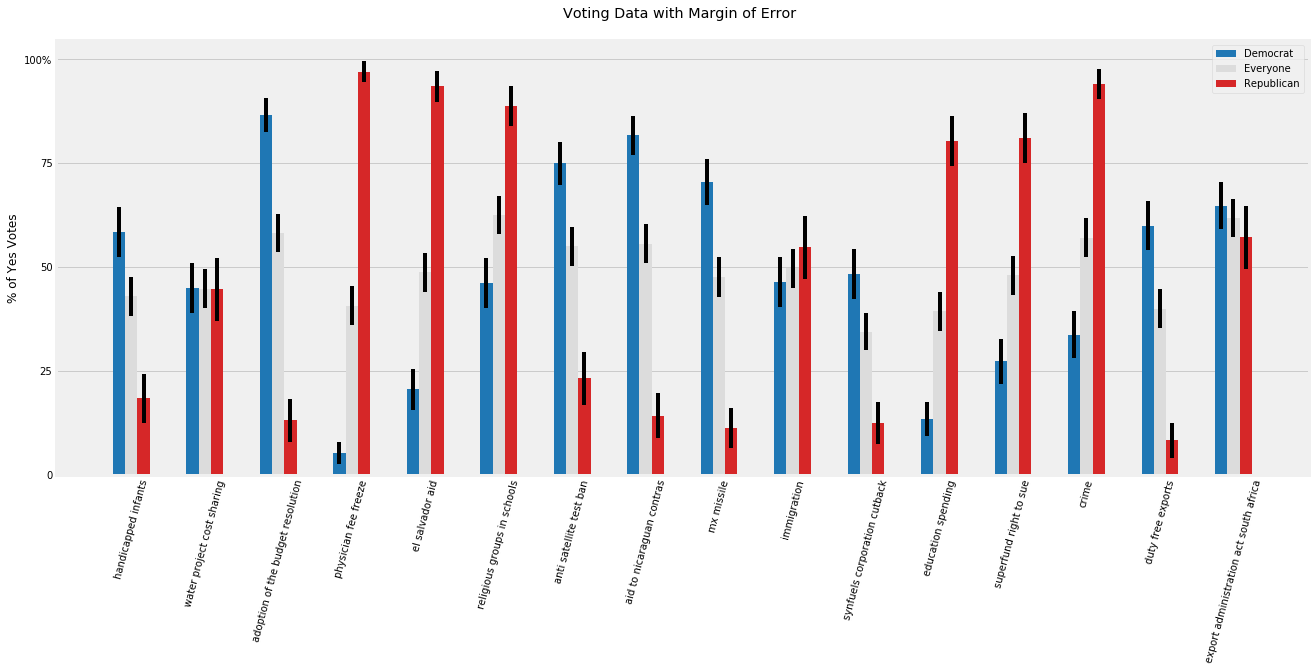

In [58]:
fig = plt.figure(figsize=(20,8))
fig.patch.set_facecolor('white')

colors = ['tab:blue', 'gainsboro', 'tab:red']

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
       plt.bar(_X - width/2. + i/float(n)*width, vals[i]['mean'], 
                width=width/float(n), align="edge", yerr=vals[i]['moe'],
                color=colors[i])   
    plt.xticks(_X, X)

subcategorybar(
    df_confidences.index,
    [
     dem_confidences,
     df_confidences,
     rep_confidences     
    ],
    width=0.5
)

plt.yticks(np.arange(0, 1.01, .25), ['0', '25', '50', '75', '100%'])
plt.ylabel('% of Yes Votes')

plt.xticks(rotation=75)

plt.legend(['Democrat', 'Everyone', 'Republican'])

plt.title('Voting Data with Margin of Error \n')
plt.grid(axis="x")

plt.show()

We can learn a lot of things from this graph. We can see that there's no issue that one party completely supports or rejects. We can see that there's only a couple issues where the sample means for each party overlap.

In [44]:
# Take a dataset that we have used in the past in class that has categorical 
# variables. Pick two of those categorical variables and run a chi-squared 
# tests on that data

#    1) By hand using Numpy
#    2) In a single line using Scipy

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')



"""
    Income --> x
    Lifespan --> y
    Region --> color
    Population --> size
    Year --> animation frame (alternative: small multiple)
    Country --> annotation
"""

df = (income
          .merge(lifespan)
          .merge(population)
          .merge(entities[['country', 'name', 'world_6region']], left_on="geo", right_on="country"))

df.drop(columns=['geo', 'country'], inplace=True)
df.rename(columns={
    'time': 'Year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'Income',
    'life_expectancy_years': 'Lifespan',
    'population_total': 'Population',
    'world_6region': 'Region',
    'name': 'Country'
}, inplace=True)

df = df[['Year', 'Country', 'Region', 'Income', 'Lifespan', 'Population']]

df['Region'] = df['Region'].str.replace('_', ' ').str.title()

df.head()

,Year,Country,Region,Income,Lifespan,Population
0,1800,Afghanistan,South Asia,603,28.21,3280000
1,1801,Afghanistan,South Asia,603,28.20,3280000
2,1802,Afghanistan,South Asia,603,28.19,3280000
3,1803,Afghanistan,South Asia,603,28.18,3280000
4,1804,Afghanistan,South Asia,603,28.17,3280000


In [45]:
last_year = df.loc[df['Year'] == max(df['Year'])]

last_year.head(), last_year.shape

(      Year               Country                    Region  Income  Lifespan  Population
 218   2018           Afghanistan                South Asia    1867     58.69    36373176
 437   2018                Angola        Sub Saharan Africa    5846     65.19    30774205
 656   2018               Albania       Europe Central Asia   12424     78.01     2934363
 922   2018  United Arab Emirates  Middle East North Africa   68231     76.89     9541615
 1141  2018             Argentina                   America   18942     76.97    44688864,
 (184, 6))

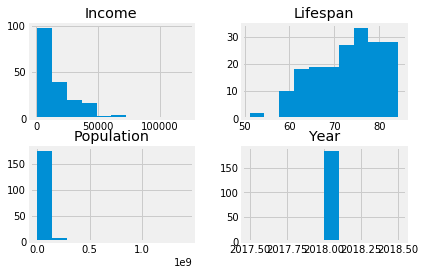

In [65]:
# Take a dataset that we have used in the past in class that has categorical 
# variables. Pick two of those categorical variables and run a chi-squared 
# tests on that data

#    1) By hand using Numpy
#    2) In a single line using Scipy

# by hand

last_year.hist();

In [68]:
last_year['Region'].unique()

array(['South Asia', 'Sub Saharan Africa', 'Europe Central Asia',
       'Middle East North Africa', 'America', 'East Asia Pacific'],
      dtype=object)

In [71]:
income = last_year['Income']

cuts = pd.qcut(income, 5)

cuts.unique()

[(628.999, 2859.2], (2859.2, 7723.0], (7723.0, 15987.8], (30346.4, 121033.0], (15987.8, 30346.4]]
Categories (5, interval[float64]): [(628.999, 2859.2] < (2859.2, 7723.0] < (7723.0, 15987.8] <
                                    (15987.8, 30346.4] < (30346.4, 121033.0]]

In [0]:
# i'm just gunna stop here cuz i think i need a data set with a normal distribution

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)